#**Reproducir interés vs gráfico principal**
##**Tarea**
El conjunto de datos que se te da aquí es el conjunto de datos hipotecario usado anteriormente en este curso. Tu meta es reproducir un gráfico. El plot negro es la hipoteca de 30 años al 5% y la línea azul es al 3%. Lo que está graficado es el interés acumulado pagado en el transcurso del préstamo. Nota que no es un gráfico hermoso. No dice qué línea corresponde a qué hipoteca y el gráfico en sí no es visualmente el más atractivo. Estos son los tipos de problemas que se cubren a lo largo del curso. 

In [2]:
#Montar datos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
#Importar librerias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
interest = pd.read_csv('/content/drive/MyDrive/CODING_DOJO/Week_3/interes.csv')

In [4]:
interest['Interest Rate'].value_counts()

0.05    540
0.03    540
Name: Interest Rate, dtype: int64

In [45]:
interest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             1080 non-null   int64  
 1   Starting Balance  1080 non-null   float64
 2   Repayment         1080 non-null   float64
 3   Interest Paid     1080 non-null   float64
 4   Principal Paid    1080 non-null   float64
 5   New Balance       1080 non-null   float64
 6   Mortgage Name     1080 non-null   object 
 7   Interest Rate     1080 non-null   float64
 8   Cum_int_paid      1080 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 76.1+ KB


In [56]:
#Genero la variable acumulada del interes pagado
interest['Cum_int_paid'] = interest.groupby(['Interest Rate',"Mortgage Name"])['Interest Paid'].cumsum()

In [ ]:
#Me quedo con el interes de 30 años
interest30 = interest.loc[interest['Mortgage Name']=="30 Year",:]
interest30

In [77]:
#Genero la lista de 5% de interes para poder graficar
int_5 = interest30.loc[interest30['Interest Rate']==0.05,:] 
int_5.set_index("Month", inplace = True)
list5 = int_5['Cum_int_paid']
list5


Month
1        1666.66
2        3331.32
3        4993.97
4        6654.60
5        8313.20
         ...    
356    372928.64
357    372964.02
358    372990.60
359    373008.35
360    373017.23
Name: Cum_int_paid, Length: 360, dtype: float64

In [80]:
#Genero la lista de 3% de interes para poder graficar
int_3 = interest30.loc[interest30['Interest Rate']==0.03,:] 
int_3.set_index("Month", inplace = True)
list3 = int_3['Cum_int_paid']
list3

Month
1        1000.00
2        1998.28
3        2994.84
4        3989.67
5        4982.77
         ...    
356    207064.13
357    207080.87
358    207093.44
359    207101.82
360    207106.01
Name: Cum_int_paid, Length: 360, dtype: float64

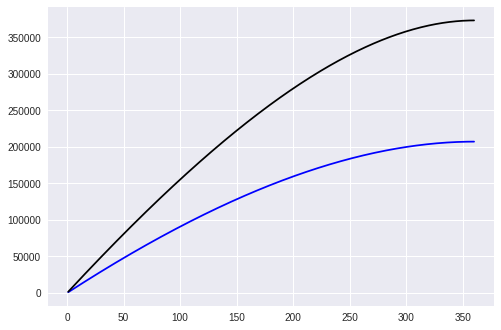

In [94]:
#Genero el gráfico y le asigno el indice de la lista de interes 3% (es el mismo indice que la de 5%)
month = list(list3.index)
plt.style.use('seaborn')
plt.plot(month, list3,c = 'blue')
plt.plot(month,list5,c='black')
plt.show()

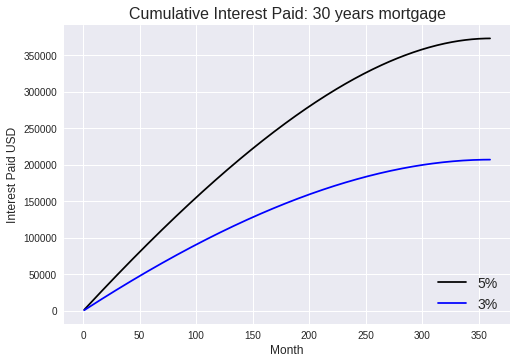

In [110]:


month = list(list3.index)
plt.plot(month,list5,c='black',label="5%")
plt.plot(month, list3,c = 'blue',label="3%")
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Interest Paid USD', fontsize = 12)
plt.title('Cumulative Interest Paid: 30 years mortgage', fontsize = 16)
plt.legend(loc ="lower right",fontsize = 14)
plt.show()
